## Calculating Eigenvalues

In [22]:
import numpy as np
from numpy import linalg as LA

# Matrix [2, 2
#         8, 2]

input = np.array([[2,2],[8,2]])

eig_val, eig_vect = LA.eig(input)

print(f"Eigenvalues: {eig_val}")
print(f"Eigenvectors: {eig_vect}")

Eigenvalues: [ 6. -2.]
Eigenvectors: [[ 0.4472136  -0.4472136 ]
 [ 0.89442719  0.89442719]]


# Practice

## Spectral Clustering

In [23]:
# import libraries
from sklearn.datasets import make_moons
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
X, y = make_moons(n_samples=500, noise=0.07, random_state=42)

df = pd.DataFrame(X, columns=["x1", "x2"])
df['true_label'] = y

df.head()

,x1,x2,true_label
0,0.830622,-0.432614,1
1,0.740349,0.825196,0
2,1.033435,-0.489607,1
3,-0.293316,0.964066,0
4,0.308208,1.093364,0


In [25]:
df.describe()

,x1,x2,true_label
count,500.000000,500.000000,500.000000
mean,0.506351,0.251878,0.500000
std,0.871766,0.501909,0.500501
min,-1.131984,-0.653358,0.000000
25%,-0.036730,-0.209559,0.000000
50%,0.473618,0.261045,0.500000
75%,1.057580,0.695747,1.000000
max,2.117060,1.164108,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

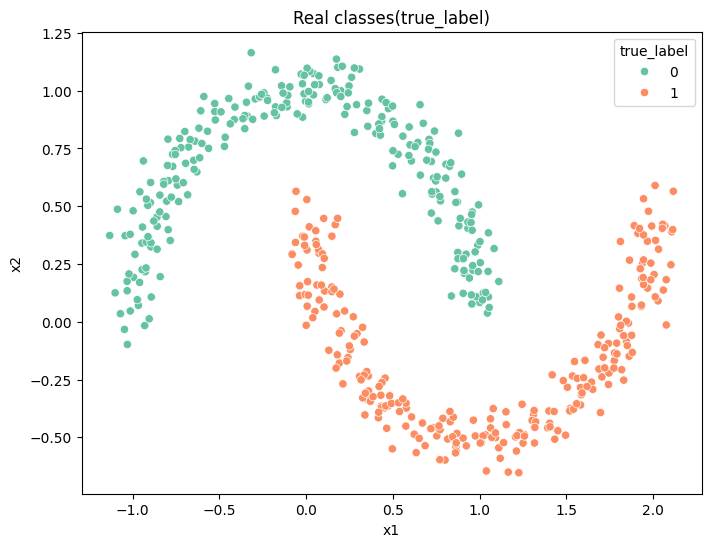

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="x1", y="x2", hue='true_label', palette="Set2")
plt.title("Real classes(true_label)")
plt.show

In [ ]:
# Stardandization
scaler = StandardScaler()
X_scaled = scaler.set_output(transform='pandas').fit_transform(X)
X_scaled.describe()

,x0,x1
count,5.000000e+02,5.000000e+02
mean,-2.842171e-17,-2.833289e-16
std,1.001002e+00,1.001002e+00
min,-1.881210e+00,-1.805392e+00
25%,-6.235898e-01,-9.202859e-01
50%,-3.758526e-02,1.828131e-02
75%,6.329463e-01,8.852454e-01
max,1.849489e+00,1.819339e+00


In [30]:
# Spectral Clustering
spec = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
predict_labels = spec.fit_predict(X_scaled)
df['predict_label'] = predict_labels
df.head()

/Users/elizabethsheremet/numerical-py/.venv/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


,x1,x2,true_label,predict_label
0,0.830622,-0.432614,1,0
1,0.740349,0.825196,0,1
2,1.033435,-0.489607,1,0
3,-0.293316,0.964066,0,1
4,0.308208,1.093364,0,1


In [31]:
cm = confusion_matrix(df['true_label'], df['predict_label'])
print(f"Confusion matrix:\n {cm}")

Confusion matrix:
 [[  0 250]
 [250   0]]


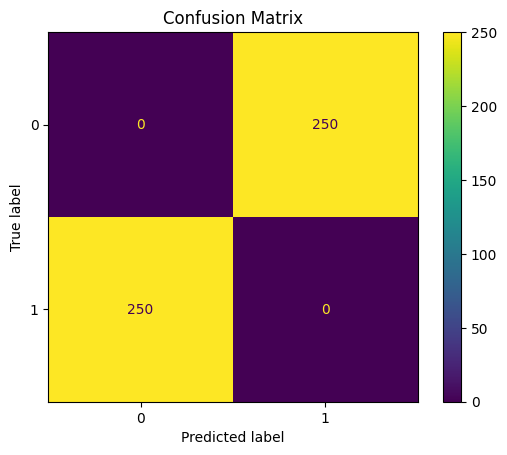

In [37]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix")
plt.show()

In [32]:
from sklearn.metrics import adjusted_rand_score
# Adjusted Rand Index (ARI):
# if score ~ 1 => ideal scenario
score = adjusted_rand_score(df['true_label'], df['predict_label'])
print(f"Clustering Quantity: {score}")

Clustering Quantity: 1.0


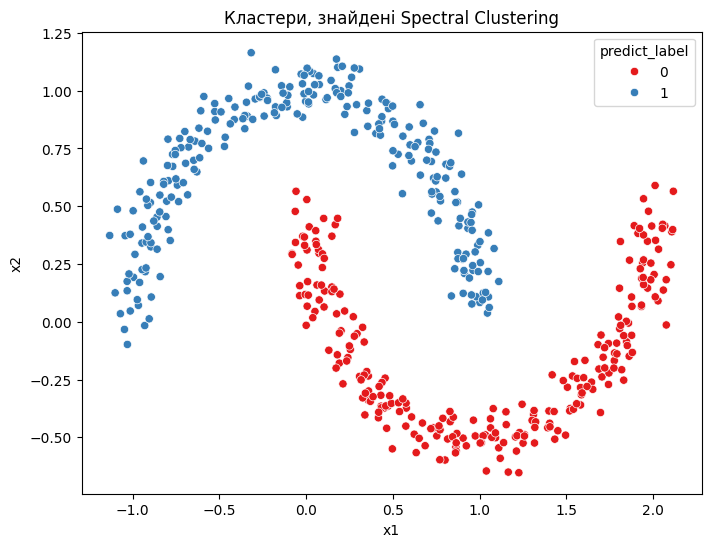

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x1", y="x2", hue="predict_label", palette="Set1")
plt.title("Кластери, знайдені Spectral Clustering")
plt.show()